In [298]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import cv2
import os
from tqdm import tqdm  
import random

In [300]:
base_path = r"C:\Users\gomaa\Downloads\german_traffic_signs"
train_csv_path = os.path.join(base_path, "train.csv")
test_csv_path = os.path.join(base_path, "test.csv")
meta_csv_path = os.path.join(base_path, "meta.csv")
train_images_path = os.path.join(base_path, "train")
test_images_path = os.path.join(base_path, "test")
meta_images_path = os.path.join(base_path, "meta")

In [302]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)
meta_data = pd.read_csv(meta_csv_path)

In [304]:
train_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [306]:
selected_classes = [0, 12, 13, 15, 33]
filtered_train_data = train_data[train_data['ClassId'].isin(selected_classes)]
filtered_test_data = test_data[test_data['ClassId'].isin(selected_classes)]
print(filtered_train_data.head())
print(filtered_test_data.head())

     Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
360     29      30       5       6      24      25        0   
361     30      30       5       5      25      25        0   
362     30      30       5       5      25      25        0   
363     31      31       5       5      26      26        0   
364     30      32       5       6      25      26        0   

                              Path  
360  Train/0/00000_00000_00000.png  
361  Train/0/00000_00000_00001.png  
362  Train/0/00000_00000_00002.png  
363  Train/0/00000_00000_00003.png  
364  Train/0/00000_00000_00004.png  
    Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
3      27      29       5       5      22      24       33  Test/00003.png
7      32      33       5       5      26      28       12  Test/00007.png
10     38      37       6       5      33      32       12  Test/00010.png
21     52      55       5       6      47      49       33  Test/00021.png
26     56      49       

In [308]:
filtered_train_data = filtered_train_data.sample(frac=1).reset_index(drop=True)
print(filtered_train_data.head())

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     67      65       6       5      61      59       33   
1     83      81       7       8      76      74       12   
2     53      52       6       5      48      47       12   
3     51      51       5       5      46      46       12   
4     33      31       6       5      28      26       13   

                             Path  
0  Train/33/00033_00005_00003.png  
1  Train/12/00012_00023_00029.png  
2  Train/12/00012_00017_00018.png  
3  Train/12/00012_00034_00000.png  
4  Train/13/00013_00000_00009.png  


In [311]:
X_train = []
y_train = []


root_path = r"C:\Users\gomaa\Downloads\german_traffic_signs"
image_size = (50, 50)

for index, row in filtered_train_data.iterrows():
    img_path = os.path.join(root_path, row['Path'])  
    if not os.path.exists(img_path): 
        print(f"Image not found: {img_path}")
        continue

    img = cv2.imread(img_path)
    if img is not None:
        img_resized = cv2.resize(img, image_size)

        
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        img_equalized = cv2.equalizeHist(img_gray)

        center = (image_size[0] // 2, image_size[1] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, 15, 1)  
        img_rotated = cv2.warpAffine(img_equalized, rotation_matrix, image_size)

        img_flipped = cv2.flip(img_rotated, 1)

        img_normalized = img_flipped / 255.0

        X_train.append(img_normalized)
        y_train.append(row['ClassId'])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"Number of Training Images: {len(X_train)}")
print(f"Training Data Shape: {X_train.shape}")

Number of Training Images: 5789
Training Data Shape: (5789, 50, 50)


In [314]:
root_path = r"C:\Users\gomaa\Downloads\german_traffic_signs"

image_size = (50, 50)

X_test = []
y_test = []

for index, row in filtered_test_data.iterrows():
    img_path = os.path.join(root_path, row['Path'])  
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue

    img = cv2.imread(img_path)
    if img is not None:
       
            img_resized = cv2.resize(img, image_size)
            
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            
            img_equalized = cv2.equalizeHist(img_gray)
            
            center = (image_size[0] // 2, image_size[1] // 2)
            rotation_matrix = cv2.getRotationMatrix2D(center, 15, 1)
            img_rotated = cv2.warpAffine(img_equalized, rotation_matrix, image_size)
            
            img_flipped = cv2.flip(img_rotated, 1)
            
            img_normalized = img_flipped / 255.0
            
            X_test.append(img_normalized)
            y_test.append(row['ClassId'])  
       

X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Number of Test Images: {len(X_test)}")
print(f"Test Data Shape: {X_test.shape}")

Number of Test Images: 1890
Test Data Shape: (1890, 50, 50)


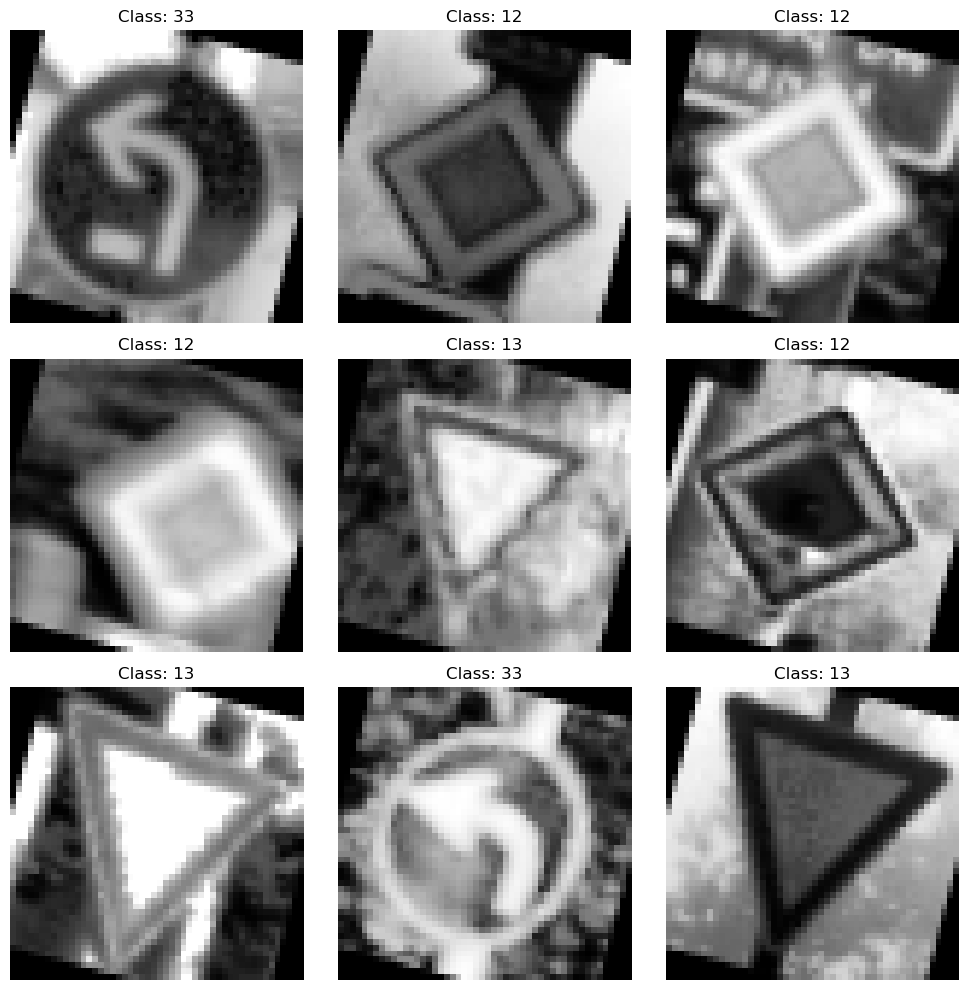

In [316]:
plt.figure(figsize=(10, 10))
for i in range(min(9, len(X_train))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(image_size[0], image_size[1]), cmap='gray')
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [318]:
X_train = X_train.reshape(X_train.shape[0], -1)  
X_test= X_test.reshape(X_test.shape[0], -1) 

In [320]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train )


KNeighborsClassifier(n_neighbors=3)

In [322]:
Y_pred=knn.predict(X_test)

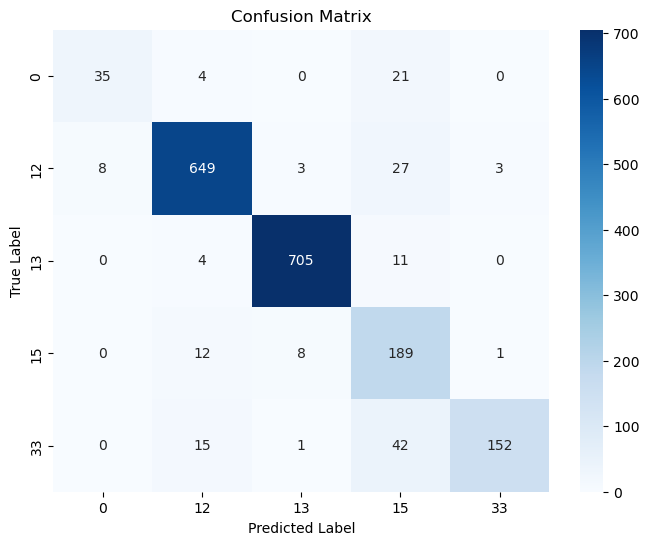

In [324]:
cm = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

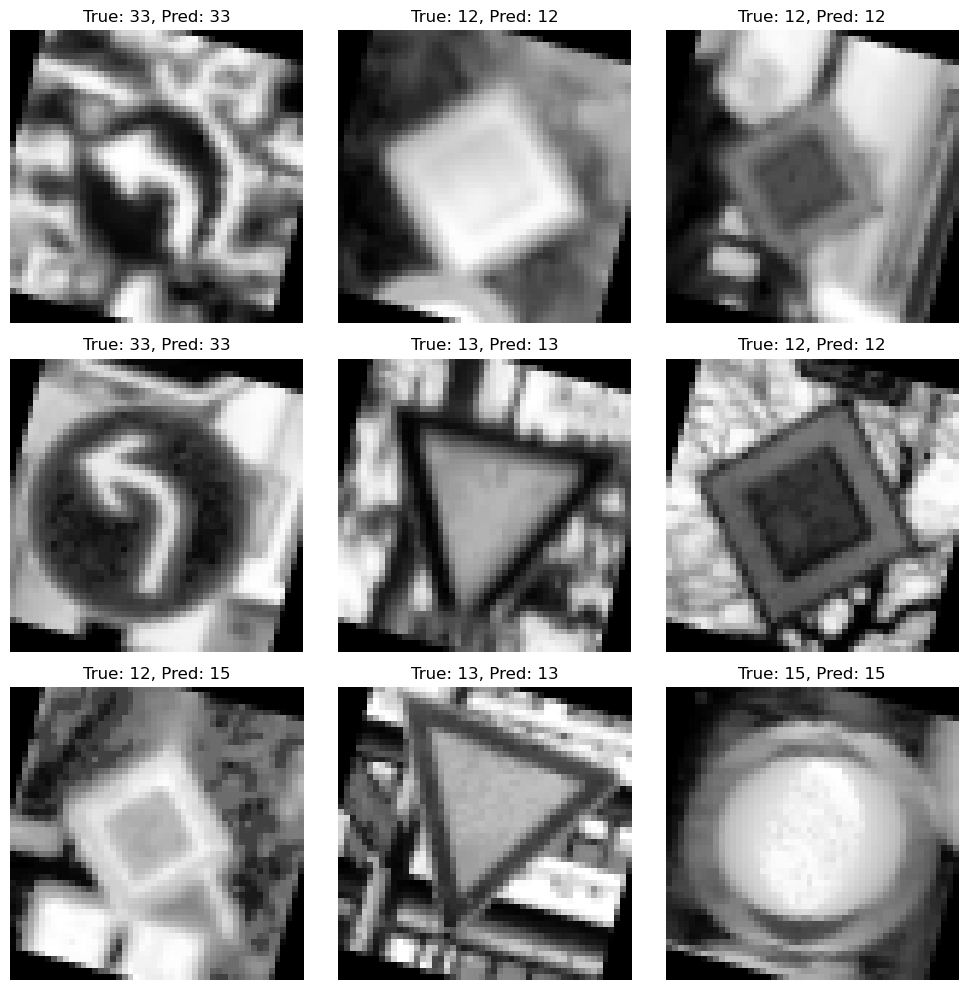

In [326]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(image_size[0], image_size[1]), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {Y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [328]:
accuracy_score(y_test,Y_pred)

0.9153439153439153